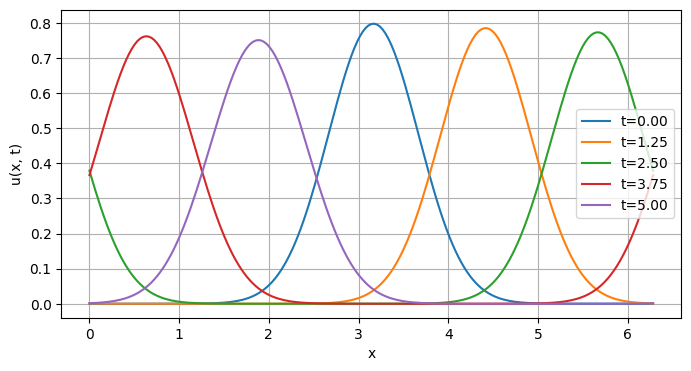

Saved animation: Linear_Convection_Gaussian_Periodic.gif


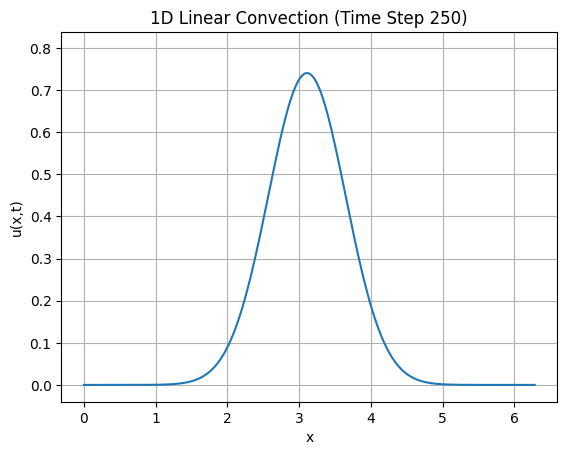

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Parameters
nx = 201  # Number of spatial grid points
L = 2.0 * np.pi  # Length of the domain
dx = L / (nx - 1)  # Spatial step size
x = np.linspace(0, L, nx)  # Spatial grid
dt = 0.025  # Time step size
nt = 250  # Number of time steps

c = 1  # Wave speed

# Gaussian initial condition
def initial_condition_gaussian(x):
    gaussian = np.exp(-0.5 * ((x - np.pi) / 0.5)**2)
    
    # Area under the curve using the trapezoidal rule
    area = np.trapezoid(gaussian, x)
    
    # Normalize the Gaussian by dividing it by its area
    return gaussian / area

# Animation function
def create_animation(x, u_hist, name):
    fig, ax = plt.subplots()
    line, = ax.plot(x, u_hist[0], label='u(x,t)')
    ax.set_xlabel('x')
    ax.set_ylabel('u(x,t)')
    # ax.set_ylim(-2, 2)
    ax.set_title('1D Linear Convection')
    ax.grid(True)

    def animate(i):
        line.set_ydata(u_hist[i])
        ax.set_title(f"1D Linear Convection (Time Step {i})")
        return line,

    ani = FuncAnimation(fig, animate, frames=len(u_hist), interval=100, blit=True)
    filename = f"{name.replace(' ', '_')}.gif"
    ani.save(filename, writer=PillowWriter(fps=30))
    print(f"Saved animation: {filename}")
    plt.show()

# Main simulation
u = initial_condition_gaussian(x)  # Initial condition
u_hist = [u.copy()]  # To store solutions at each time step

un = np.ones(nx)  # Temporary array

# plot the initial condition
plt.figure(figsize=(8, 4))
# plt.plot(x, u, label="t=0")
# plt.title(f'{name} Kutta4. With {nt} steps')
plt.xlabel('x')
plt.ylabel('u(x, t)')

# Time-stepping loop with periodic boundary conditions
for n in range(nt):  # For each time step
    un = u.copy()  # Copy current solution
    for i in range(1, nx-1):  # Exclude boundaries for now
        u[i] = un[i] - c * dt / dx * (un[i] - un[i - 1])
    # Apply periodic boundary conditions
    u[0] = un[0] - c * dt / dx * (un[0] - un[-2])  # Left boundary depends on second-to-last point
    u[-1] = u[0]  # Right boundary wraps to left boundary
    # if n % (nt/20):
    # plot intermediate steps for visualization
    if n % (nt / 5) == 0:
        plt.plot(x, u, label=f"t={n * dt:.2f}")

    u_hist.append(u.copy())  # Store solution for animation

plt.legend()
plt.grid(True)
plt.show()

# Create animation
create_animation(x, u_hist, name="Linear Convection Gaussian Periodic")